In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_kakao = pd.read_csv('./src/네이버종토방댓글_카카오_7500.csv')
df_samsung = pd.read_csv('./src/네이버종토방댓글_삼성전자_10000.csv')
df_samsung

,날짜,댓글,조회수,좋아요,싫어요
0,2022-05-02,개미들 바닥에서 잘샀네..,29,0,2
1,2022-05-02,* 내일 상한가 : 코스모화학...,17,0,0
2,2022-05-02,문재앙이 가장 이해 안가는일 양산 아방궁...,29,4,3
3,2022-05-02,"●[속보]문재인,이재용 사면 안한다●",50,0,0
4,2022-05-02,사면 나가리~,29,1,0
...,...,...,...,...,...
199995,2021-12-14,양성전자가자!! 10만가자!!,325,0,0
199996,2021-12-14,답글:[삭제된 게시물의 답글]쳐맞고 있는건 석...,294,0,1
199997,2021-12-14,규모 4.9 지진,345,2,3
199998,2021-12-14,지진났어도 뭉가리는호주에서 신나게ㅡ,332,3,3


In [3]:
def cal_group(comment_df):
    day_df = pd.DataFrame()
    day_df[['날짜','댓글 수']] = comment_df.groupby('날짜').count().reset_index()[['날짜','댓글']]
    day_df['조회수 합계'] = comment_df.groupby('날짜').sum().reset_index()['조회수']
    day_df['조회수 평균'] = comment_df.groupby('날짜').mean().reset_index()['조회수']
    day_df['날짜'] = pd.to_datetime(day_df['날짜'])
    day_df = day_df.set_index('날짜')
    return day_df

day_df_kakao = cal_group(df_kakao)
day_df_samsung = cal_group(df_samsung)

,댓글 수,조회수 합계,조회수 평균
날짜,,,
2021-02-10,112,60538,540.517857
2021-02-11,52,38070,732.115385
2021-02-12,42,23393,556.976190
2021-02-13,61,27989,458.836066
2021-02-14,55,27752,504.581818
...,...,...,...
2022-04-25,274,61778,225.467153
2022-04-26,174,38599,221.833333
2022-04-27,355,78178,220.219718


In [4]:
pykrx_df = stock.get_market_ohlcv_by_date(fromdate='2021-02-15', todate='2022-04-28', ticker="035720", adjusted=False)
pykrx_df

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2021-02-15,499000,505000,492000,502000,1052548,525405008000,2.55
2021-02-16,504000,519000,499500,514000,1076048,547462467000,2.39
2021-02-17,515000,515000,503000,509000,562572,285858658000,-0.97
2021-02-18,506000,517000,501000,501000,466922,236538803000,-1.57
2021-02-19,497000,506000,490000,504000,695664,345815290000,0.60
...,...,...,...,...,...,...,...
2022-04-22,92200,92400,91400,92000,1553904,142543689400,-1.71
2022-04-25,90400,91600,89600,89700,1511408,136367837200,-2.50
2022-04-26,89800,91700,89700,90200,1368258,123958023400,0.56


In [5]:
df = pykrx_df.join(day_df).reset_index()
df

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,댓글 수,조회수 합계,조회수 평균
0,2021-02-15,499000,505000,492000,502000,1052548,525405008000,2.55,259,145509,561.810811
1,2021-02-16,504000,519000,499500,514000,1076048,547462467000,2.39,261,133934,513.157088
2,2021-02-17,515000,515000,503000,509000,562572,285858658000,-0.97,120,64558,537.983333
3,2021-02-18,506000,517000,501000,501000,466922,236538803000,-1.57,188,85249,453.452128
4,2021-02-19,497000,506000,490000,504000,695664,345815290000,0.60,208,97699,469.706731
...,...,...,...,...,...,...,...,...,...,...,...
294,2022-04-22,92200,92400,91400,92000,1553904,142543689400,-1.71,246,54952,223.382114
295,2022-04-25,90400,91600,89600,89700,1511408,136367837200,-2.50,274,61778,225.467153
296,2022-04-26,89800,91700,89700,90200,1368258,123958023400,0.56,174,38599,221.833333
297,2022-04-27,87600,88900,87600,88400,1390581,122826213900,-2.00,355,78178,220.219718


In [6]:
# df['등락률'].abs() # 절대값
# df['댓글 수'].diff() # 차이
# df['댓글 수'].pct_change() # 차이 백분률

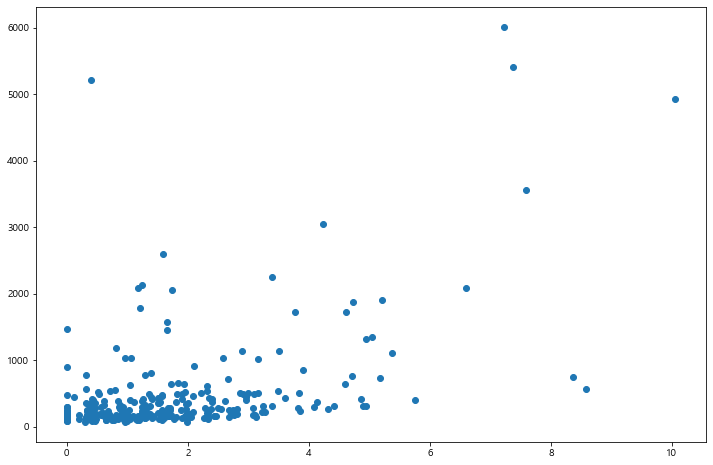

In [7]:
plt.figure(figsize=(12,8))

x = df['등락률'].abs()
y = df['댓글 수']

plt.scatter(x, y)
plt.show()

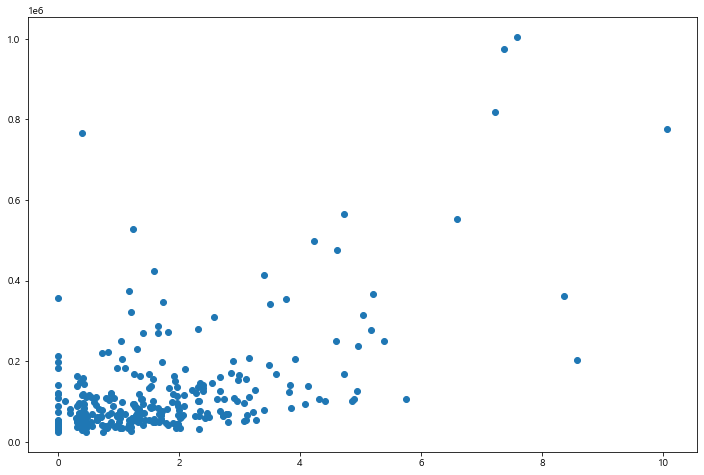

In [8]:
plt.figure(figsize=(12,8))

x = df['등락률'].abs()
y = df['조회수 합계']

plt.scatter(x, y)
plt.show()

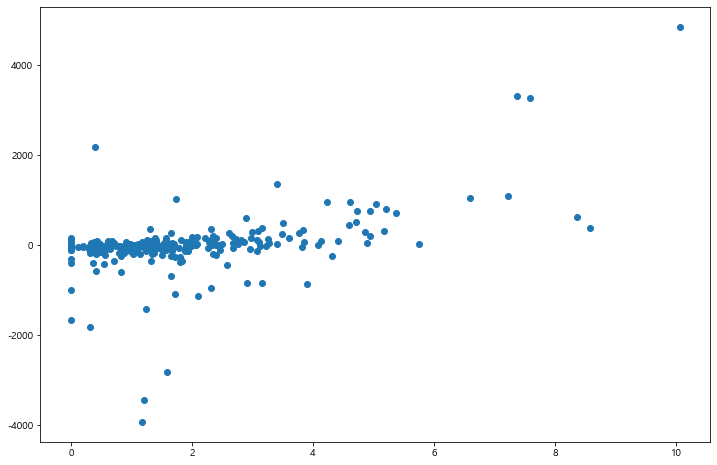

In [14]:
plt.figure(figsize=(12,8))

x = df['등락률'].abs()
y = df['댓글 수'].diff()

plt.scatter(x, y)
plt.show()

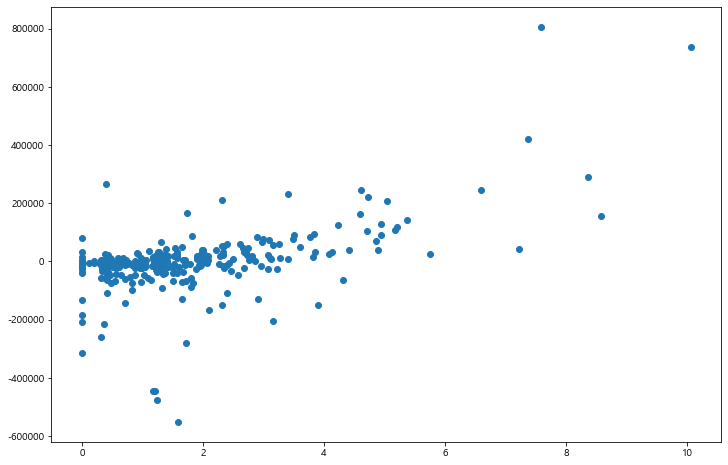

In [13]:
plt.figure(figsize=(12,8))

x = df['등락률'].abs()
y = df['조회수 합계'].diff()

plt.scatter(x, y)
plt.show()